In [2]:
import numpy as np
import os as os
from scipy.optimize import curve_fit
from scipy.stats import pearsonr, norm
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def expon_dist(x, lam, a):
    return a*np.exp(-lam*x)

def pareto_dist(x, x_min, alpha):
    return (x_min / x)*alpha

def fit_pareto(length, bins):
    popt, pcov = curve_fit(pareto_dist, length, bins, [1, 1])
    return popt

def fit_expon(length, bins):
    popt, pcov = curve_fit(expon_dist, length, bins, [1, 1])
    return popt

# Score Probability

In [ ]:
#Getting and normalizing regular docking data, seperating out 50% best scores

data = np.genfromtxt("homodimer_data/homodimer_patchdock/d3f8ba__d3f8ba_.txt",
                          delimiter = "|",
                          skip_header = 25)
data = data[:, 1]
data_end = .75* np.max(data)
best_data = data[data > data_end]

# Getting fine docking data, seperating out 50% best scores

fine_data = np.genfromtxt("homodimer_data/homodimer_patchdock_fine/d3f8ba_/d3f8ba__d3f8ba_.txt",
                          delimiter = "|",
                          skip_header = 25)
fine_data = fine_data[:, 1]
fine_end = .75*np.max(fine_data)
best_fine = fine_data[fine_data > fine_end]

# Creating histogram of regular docking data

fig, (ax1, ax2) = plt.subplots(1, 2, tight_layout = True, figsize = (12, 4))

hist = ax1.hist(data,
         bins = round(1 + 3.322*np.log(len(data))),
         color = "teal",
         edgecolor = 'k')

# Fitting probability distributions to regular docking

ax3 = ax1.twinx().twiny()

bin_counts = hist[0]
bins = hist[1]
fit_length = np.linspace(np.min(data), 1, round(1 + 3.322*np.log(len(data))), endpoint=True)

fit_params_pareto = fit_pareto(bins[:-1], bin_counts)
pareto_fit_hist = pareto_dist(fit_length, fit_params_pareto[0], fit_params_pareto[1])

fit_params_expon = fit_expon(bins[:-1], bin_counts)
expon_fit_hist = expon_dist(fit_length, fit_params_expon[0], fit_params_expon[1])

ax3.plot(fit_length, pareto_fit_hist, color = "r", linestyle = "-.")
ax3.plot(fit_length, expon_fit_hist, color = "orange", linestyle = "-.")
ax3.tick_params(right = False)
ax3.set_yticklabels([])
ax3.tick_params(top = False)
ax3.set_xticklabels([])
ax3.set_ylim(0)

# Plotting 50% best data

hist = ax2.hist(best_data,
         bins = round(1 + 3.322*np.log(len(best_data))),
         color = "teal",
         edgecolor = 'k')

count_high = np.max(hist[0])

ax2.set_xlim(np.min(best_data))
ax2.set_ylim(0, count_high+20)

count_high = np.max(hist[0])

ax4 = ax2.twinx().twiny()

ax4.plot(fit_length, pareto_fit_hist, color = "r", linestyle = "-.")
ax4.plot(fit_length, expon_fit_hist, color = "orange", linestyle = "-.")
ax4.tick_params(right = False)
ax4.set_yticklabels([])
ax4.tick_params(top = False)
ax4.set_xticklabels([])
ax4.set_xlim(np.min(best_data))
ax4.set_ylim(0, count_high+20)

# Regular docking figure settings

fig.suptitle("Regular Docking")
fig.supxlabel("Score")
fig.supylabel("Counts")
plt.show()
plt.close()

# Creating histogram of fine docking data

fig, (ax1, ax2) = plt.subplots(1, 2, tight_layout = True, figsize = (12, 4))

hist = ax1.hist(fine_data,
         bins = round(1 + 3.322*np.log(len(data))),
         color = "teal",
         edgecolor = 'k')

# Fitting probability distributions to fine docking

ax3 = ax1.twinx().twiny()

bin_counts = hist[0]
bins = hist[1]
fit_length = np.linspace(np.min(fine_data), np.max(fine_data), round(1 + 3.322*np.log(len(data))), endpoint=True)

fit_params_pareto = fit_pareto(bins[:-1], bin_counts)
pareto_fit_hist = pareto_dist(fit_length, fit_params_pareto[0], fit_params_pareto[1])

fit_params_expon = fit_expon(bins[:-1], bin_counts)
expon_fit_hist = expon_dist(fit_length, fit_params_expon[0], fit_params_expon[1])

ax3.plot(fit_length, pareto_fit_hist, color = "r", linestyle = "-.")
ax3.plot(fit_length, expon_fit_hist, color = "orange", linestyle = "-.")
ax3.tick_params(right = False)
ax3.set_yticklabels([])
ax3.tick_params(top = False)
ax3.set_xticklabels([])
ax3.set_ylim(0)

# Plotting 50% best data

hist = ax2.hist(best_fine,
         bins = round(1 + 3.322*np.log(len(best_fine))),
         color = "teal",
         edgecolor = 'k')

count_high = np.max(hist[0])

ax2.set_xlim(np.min(best_fine))
ax2.set_ylim(0, count_high+20)

count_high = np.max(hist[0])

ax4 = ax2.twinx().twiny()

ax4.plot(fit_length, pareto_fit_hist, color = "r", linestyle = "-.")
ax4.plot(fit_length, expon_fit_hist, color = "orange", linestyle = "-.")
ax4.tick_params(right = False)
ax4.set_yticklabels([])
ax4.tick_params(top = False)
ax4.set_xticklabels([])
ax4.set_xlim(np.min(best_fine))
ax4.set_ylim(0, count_high+20)

# Fine docking figure settings

fig.suptitle("Fine Docking")
fig.supxlabel("Score")
fig.supylabel("Counts")
plt.show()

plt.close()

# Pearson Correlation

In [ ]:
# pdb_files = os.listdir("pdbs")
# pearcorr = np.zeros(len(pdb_files))

# for i in range(len(pdb_files)):
#     name = pdb_files[i][:-4]
#     counts = np.genfromtxt(f"Counts/{name}_Counts.txt", delimiter= ",")
#     scores = np.genfromtxt(f"Scores/{name}_Scores.txt", delimiter= ",")
#     count_vector = counts.flatten()
#     score_vector = scores.flatten()
#     (pears, stats) = pearsonr(score_vector, count_vector)
#     pearcorr[i] = pears

# fig, ax1 = plt.subplots(1, 1, tight_layout = True, dpi = 150)
# ax1.hist(pearcorr, bins = np.arange(0, 1.1, 0.0625), edgecolor = "k")
# ax1.set_xlim(0, 1)
# ax1.set_xlabel("Pearson Correlation Coefficent")
# ax1.set_ylabel("Counts")

# mean = np.mean(pearcorr)
# std = np.std(pearcorr, ddof = 1)
# x = np.arange(0, 1, 0.01)
# fit = norm.pdf(x, loc = mean, scale = std)

# ax2 = ax1.twinx()

# ax2.plot(x, fit, color = 'orange', label = "Gaussian")
# ax2.legend(frameon = False)
# ax2.set_ylim(0)

# plt.savefig("PCC_Silica_Shell.jpg")
# plt.show()

# KL Divergence Inverse Score

In [ ]:
# pdb_files = os.listdir("pdbs")
# kl_div_score = np.zeros(len(pdb_files))
# kl_div_count = np.zeros(len(pdb_files))

# for i in range(len(pdb_files)):
#     name = pdb_files[i][:-4]
#     counts = np.genfromtxt(f"Counts/{name}_Counts.txt", delimiter= ",")
#     scores = np.genfromtxt(f"Scores/{name}_Scores.txt", delimiter= ",")
#     count_vector = counts.flatten()
#     score_vector = scores.flatten()
#     for j in range(len(score_vector)):
#         if score_vector[j] != 0:
#             score_vector[j] = np.exp(- 1 / score_vector[j])
#     score_partition = np.sum(score_vector)
#     score_probability = score_vector / score_partition
#     for k in range(len(count_vector)):
#         if count_vector[k] != 0:
#             kl_div_score[i] += score_probability[k] * np.log(score_probability[k] / count_vector[k])
#             kl_div_count[i] += count_vector[k] * np.log(count_vector[k] / score_probability[k])

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [12, 4], tight_layout = True, dpi = 150)

# ax1.hist(kl_div_score, np.arange(0, 2.25, 0.125), edgecolor = "k")
# ax1.set_xticks(np.arange(0, 2.5, 0.5))
# ax1.set_xlim(0, 2.25)
# ax1.set_xlabel("KL Divergence of Score Probability by Docking Probability")
# ax1.set_ylabel("Number of Proteins")

# mean = np.mean(kl_div_score)
# std = np.std(kl_div_score, ddof = 1)
# x = np.arange(0, 2.25, 0.0225)
# fit = norm.pdf(x, loc = mean, scale = std)

# ax3 = ax1.twinx()

# ax3.plot(x, fit, color = 'orange', label = "Gaussian")
# ax3.legend(frameon = False)
# ax3.set_ylim(0)

# ax2.hist(kl_div_count, np.arange(0, 2.25, 0.125), edgecolor = "k")
# ax2.set_xticks(np.arange(0, 2.5, 0.5))
# ax2.set_xlim(0, 2.25)
# ax2.set_xlabel("KL Divergence of Docking Probability by Score Probability")
# ax2.set_ylabel("Number of Proteins")

# mean = np.mean(kl_div_count)
# std = np.std(kl_div_count, ddof = 1)
# x = np.arange(0, 2.25, 0.0225)
# fit = norm.pdf(x, loc = mean, scale = std)

# ax4 = ax2.twinx()

# ax4.plot(x, fit, color = 'orange', label = "Gaussian")
# ax4.legend(frameon = False)
# ax4.set_ylim(0)

# plt.savefig("KL_Inverse_Score.jpg")
# plt.show()

# KL Divergence Negative Score

In [ ]:
# pdb_files = os.listdir("pdbs")
# kl_div_score = np.zeros(len(pdb_files))
# kl_div_count = np.zeros(len(pdb_files))

# for i in range(len(pdb_files)):
#     name = pdb_files[i][:-4]
#     counts = np.genfromtxt(f"Counts/{name}_Counts.txt", delimiter= ",")
#     scores = np.genfromtxt(f"Scores/{name}_Scores.txt", delimiter= ",")
#     count_vector = counts.flatten()
#     score_vector = scores.flatten()
#     for j in range(len(score_vector)):
#         if score_vector[j] != 0:
#             score_vector[j] = np.exp(score_vector[j])
#     score_partition = np.sum(score_vector)
#     score_probability = score_vector / score_partition
#     for k in range(len(count_vector)):
#         if count_vector[k] != 0:
#             kl_div_score[i] += score_probability[k] * np.log(score_probability[k] / count_vector[k])
#             kl_div_count[i] += count_vector[k] * np.log(count_vector[k] / score_probability[k])

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [12, 4], tight_layout = True, dpi = 150)
# ax1.hist(kl_div_score, np.arange(0, 2.25, 0.125), edgecolor = "k")
# ax1.set_xticks(np.arange(0, 2.5, 0.5))
# ax1.set_xlim(0, 2.25)
# ax1.set_xlabel("KL Divergence of Score Probability by Docking Probability")
# ax1.set_ylabel("Number of Proteins")

# ax2.hist(kl_div_count, np.arange(0, 2.25, 0.125), edgecolor = "k")#
# ax2.set_xticks(np.arange(0, 2.5, 0.5))
# ax2.set_xlim(0, 2.25)
# ax2.set_xlabel("KL Divergence of Docking Probability by Score Probability")
# ax2.set_ylabel("Number of Proteins")

# mean = np.mean(kl_div_count)
# std = np.std(kl_div_count, ddof = 1)
# x = np.arange(0, 2.25, 0.0225)
# fit = norm.pdf(x, loc = mean, scale = std)

# ax4 = ax2.twinx()

# ax4.plot(x, fit, color = 'orange', label = "Gaussian")
# ax4.set_ylim(0)

# ax4.legend(frameon = False)

# mean = np.mean(kl_div_score)
# std = np.std(kl_div_score, ddof = 1)
# x = np.arange(0, 2.25, 0.0225)
# fit = norm.pdf(x, loc = mean, scale = std)

# ax3 = ax1.twinx()

# ax3.plot(x, fit, color = 'orange', label = "Gaussian")
# ax3.set_ylim(0)

# ax3.legend(frameon = False)

# plt.savefig("KL_Negative_Score.jpg")
# plt.show()

# Dataset Properties Pearson Correlation

In [3]:
dataset = pd.read_csv("NRSDP_Results.csv", header = None)
dataset = dataset.iloc[:, 1:]

properties = dataset[0:1]
properties = (properties.to_numpy())[0]
properties[13] = "RMS Roughness"

dataset = dataset[1:]
dataset = dataset.to_numpy(dtype ="float32")

columns = np.arange(0, 16)
pccs = np.zeros([16, 16])

for i in columns:
    for j in columns:
        (pears, stats) = pearsonr(dataset[:, i], dataset[:, j])
        pccs[i, j] = pears

fig, ax = plt.subplots(1, 1, tight_layout = True, dpi = 400)

plt.rcParams['axes.linewidth'] = 1.5

im = ax.imshow(pccs, vmin = -1, vmax = 1, cmap = "magma")

plt.rcParams['axes.linewidth'] = 1

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Pearson Correlation Coefficient", rotation=-90, va="bottom")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

ax.set_xticks(np.arange(0, 16), labels=properties)
ax.set_yticks(np.arange(0, 16), labels=properties)

ax.set_xticks(np.arange(0, 16)-.5, minor=True)
ax.set_yticks(np.arange(0, 16)-.5, minor=True)
ax.grid(which="minor", color="k", linestyle='-', linewidth=1, in_layout = True)
ax.tick_params(which="minor", bottom=False, left=False)

for i in range(len(pccs)):
    for j in range(len(pccs)):
        text = ax.text(j, i, round(pccs[i, j], 1),
                       ha="center", va="center", color="darkcyan", fontsize = 6, fontweight = "bold")
        
plt.savefig("PropertyCorrelation.jpg", dpi = 400)
plt.show()

ValueError: array must not contain infs or NaNs

# Mass Distribution

In [7]:
pdb_list = os.listdir("aligned")

for i in pdb_list:
    if i.endswith(".pdb") != True:
        pdb_list.remove(i)

alpha_count = list()
heavy_count = list()
protein_names = list()

for i in pdb_list: #pdb_list:
    protein_names.append(i)
    pdb = open(f"aligned/{i}", mode = "r")
    cur_alpha = 0
    cur_heavy = 0
    for line in pdb:
        if line[0:4] == "ATOM":
            if line[13:15] == "CA":
                cur_alpha += 1
            if line[13] != "H":
                cur_heavy += 1
    alpha_count.append(cur_alpha)
    heavy_count.append(cur_heavy)
    pdb.close()

atom_count_alpha = np.array(alpha_count)
sort_key_alpha = np.argsort(alpha_count)

sorted_atom_count_alpha = list()
sorted_protein_names_alpha = list()

for i in sort_key_alpha:
    sorted_atom_count_alpha.append(atom_count_alpha[i])
    sorted_protein_names_alpha.append(protein_names[i])

print(f"The lighest protein is {sorted_protein_names_alpha[0]}")
print(f"An average size protein is {sorted_protein_names_alpha[313]}")
print(f"The heaviest protein is {sorted_protein_names_alpha[-1]}")

atom_count_heavy = np.array(heavy_count)
sort_key_heavy = np.argsort(heavy_count)

sorted_atom_count_heavy = list()
sorted_protein_names_heavy = list()

for i in sort_key_heavy:
    sorted_atom_count_heavy.append(atom_count_heavy[i])
    sorted_protein_names_heavy.append(protein_names[i])

print(f"The lighest protein is {sorted_protein_names_heavy[0]}")
print(f"An average size protein is {sorted_protein_names_heavy[313]}")
print(f"The heaviest protein is {sorted_protein_names_heavy[-1]}")

The lighest protein is d2bcra2.pdb
An average size protein is d2basa2.pdb
The heaviest protein is d2jjbc_.pdb
The lighest protein is d2bcra2.pdb
An average size protein is d1hx6a2.pdb
The heaviest protein is d3ckcb_.pdb


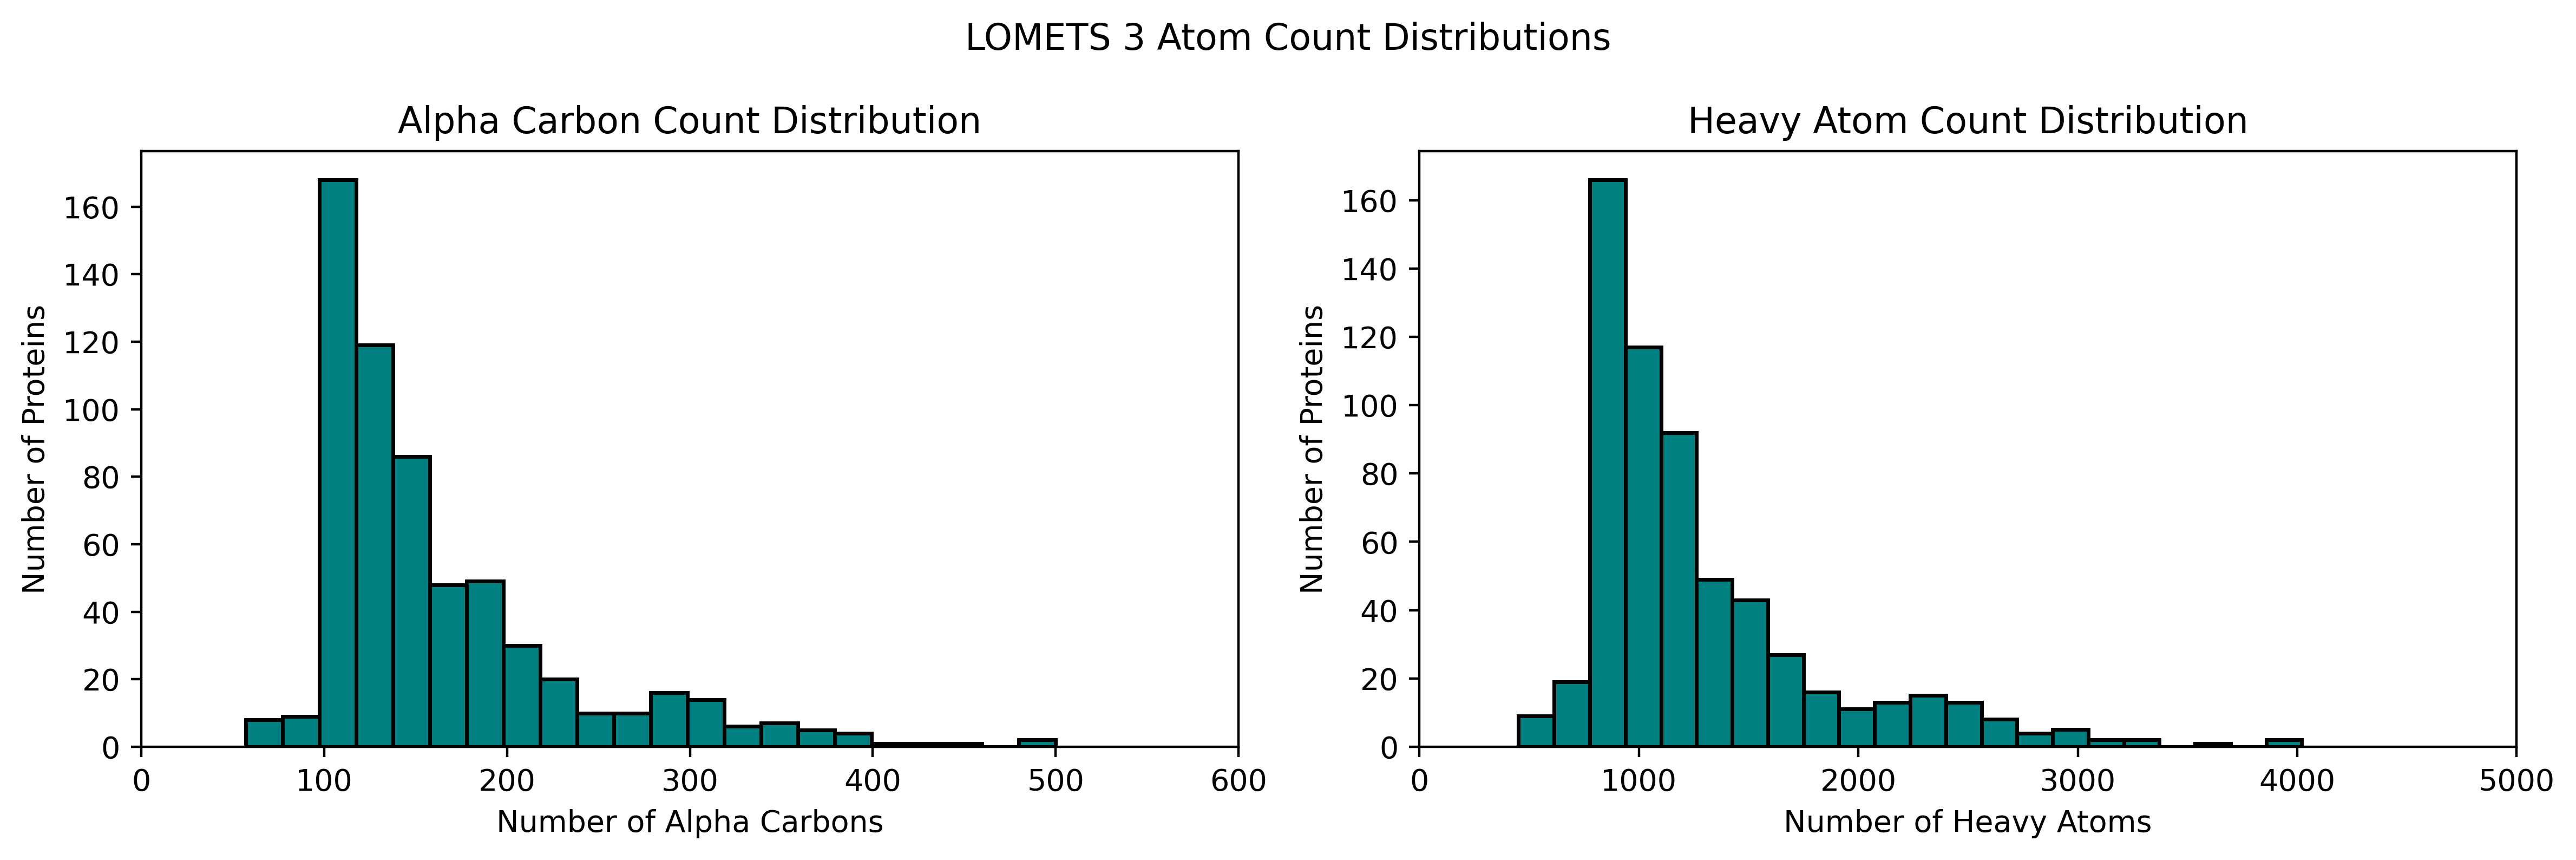

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, tight_layout = True, dpi = 400, figsize = (12,4))


fig.suptitle("LOMETS 3 Atom Count Distributions")

ax1.hist(sorted_atom_count_alpha,
         bins = round(1 + 3.322*np.log(len(sorted_atom_count_alpha))),
         color = "teal",
         edgecolor = "k",
         linewidth = 1.25)
ax1.set_title("Alpha Carbon Count Distribution")
ax1.set_xlabel("Number of Alpha Carbons")
ax1.set_ylabel("Number of Proteins")
ax1.set_xlim(0, 600)

ax2.hist(sorted_atom_count_heavy,
         bins = round(1 + 3.322*np.log(len(sorted_atom_count_heavy))),
         color = "teal",
         edgecolor = "k",
         linewidth = 1.25)
ax2.set_title("Heavy Atom Count Distribution")
ax2.set_xlabel("Number of Heavy Atoms")
ax2.set_ylabel("Number of Proteins")
ax2.set_xlim(0, 5000)

plt.savefig("Lomets3_massHist.png", dpi = 400)
plt.show()

# Sphericity

In [1]:
dataset = pd.read_csv("NRSDP_Results.csv")
sphericity_sort = dataset
sphericity_sort = sphericity_sort.sort_values(by=["Sphericity"], ascending = True)
names = sphericity_sort["Name"]
names = names.to_numpy()
sphericity = sphericity_sort["Sphericity"]
sphericity = sphericity.to_numpy()

print(f"The lowest sphericity protein is {names[0]}")
print(f"An average sphericity protein is {names[311]}")
print(f"The highest sphericty protein is {names[612]}")

plt.hist(sphericity,
         bins = round(1 + 3.322*np.log(len(sphericity))),
         color = "teal",
         edgecolor = "k",
         linewidth = 1.25)
plt.title("Sphericity Distribution of LOMETS3")
plt.xlabel("Sphericity")
plt.ylabel("Number of Proteins")
plt.xlim(0, 1)
plt.savefig("Lomets3_sphericityHist.png", dpi = 400)
plt.show()

NameError: name 'dataset' is not defined

# Radius of Gyration

The lowest Rg protein is d2bcra2.pdb
An average Rg protein is d2iv2x1.pdb
The highest Rg protein is d3umha_.pdb


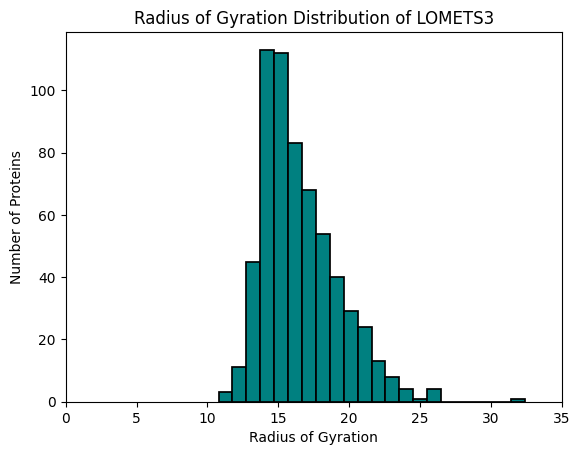

In [7]:
dataset = pd.read_csv("NRSDP_Results.csv")
rg_sort = dataset
rg_sort = rg_sort.sort_values(by=["Radius of Gyration"], ascending = True)
names = rg_sort["Name"]
names = names.to_numpy()
rg = rg_sort["Radius of Gyration"]
rg = rg.to_numpy()

print(f"The lowest Rg protein is {names[0]}")
print(f"An average Rg protein is {names[311]}")
print(f"The highest Rg protein is {names[611]}")

plt.hist(rg,
         bins = round(1 + 3.322*np.log(len(rg))),
         color = "teal",
         edgecolor = "k",
         linewidth = 1.25)
plt.title("Radius of Gyration Distribution of LOMETS3")
plt.xlabel("Radius of Gyration")
plt.ylabel("Number of Proteins")
plt.xlim(0, 35)
#plt.savefig("Lomets3_rgHist.png", dpi = 400)
plt.show()

# Arithmetic Roughness

The lowest arithmetic roughness protein is d1h4ib_.pdb
An average arithmetic roughness protein is d2vera1.pdb
The highest arithmetic roughness protein is d3ckcb_.pdb


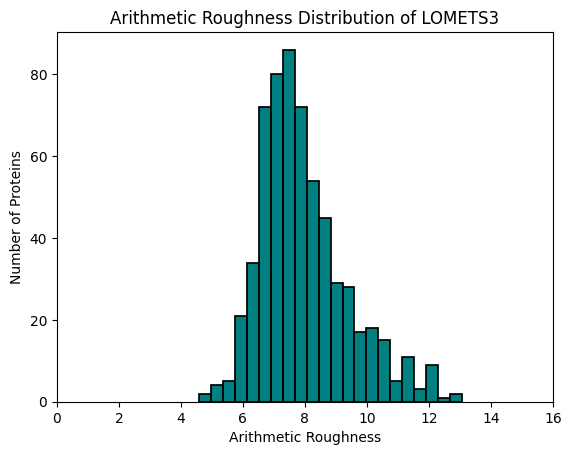

In [8]:
dataset = pd.read_csv("NRSDP_Results.csv")
ar_sort = dataset
ar_sort = ar_sort.sort_values(by=["Arithmetic Roughness"], ascending = True)
names = ar_sort["Name"]
names = names.to_numpy()
ar = ar_sort["Root Mean Square Roughness"]
ar = ar.to_numpy()

print(f"The lowest arithmetic roughness protein is {names[0]}")
print(f"An average arithmetic roughness protein is {names[311]}")
print(f"The highest arithmetic roughness protein is {names[612]}")

plt.hist(ar,
         bins = round(1 + 3.322*np.log(len(ar))),
         color = "teal",
         edgecolor = "k",
         linewidth = 1.25)
plt.title("Arithmetic Roughness Distribution of LOMETS3")
plt.xlabel("Arithmetic Roughness")
plt.ylabel("Number of Proteins")
plt.xlim(0, 16)
plt.savefig("Lomets3_ArithRough_Hist.png", dpi = 400)
plt.show()

# RMS Roughness

The lowest RMS roughness protein is d1h4ib_.pdb
An average RMS roughness protein is d1szia_.pdb
The highest RMS roughness protein is d3baka2.pdb


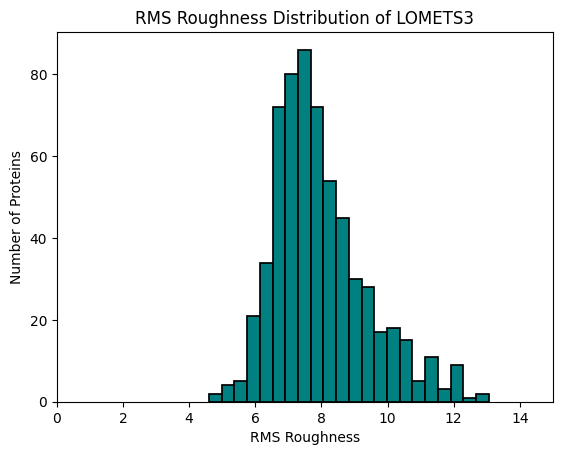

In [4]:
dataset = pd.read_csv("NRSDP_Results.csv")
rms_sort = dataset
rms_sort = rms_sort.sort_values(by=["Root Mean Square Roughness"], ascending = True)
names = rms_sort["Name"]
names = names.to_numpy()
rms = rms_sort["Root Mean Square Roughness"]
rms = rms.to_numpy()

print(f"The lowest RMS roughness protein is {names[0]}")
print(f"An average RMS roughness protein is {names[311]}")
print(f"The highest RMS roughness protein is {names[612]}")

plt.hist(rms,
         bins = round(1 + 3.322*np.log(len(rms))),
         color = "teal",
         edgecolor = "k",
         linewidth = 1.25)
plt.title("RMS Roughness Distribution of LOMETS3")
plt.xlabel("RMS Roughness")
plt.ylabel("Number of Proteins")
plt.xlim(0, 15)
plt.savefig("Lomets3_RMSRoughHist.png", dpi = 350)
plt.show()

# SASA

The lowest SASA protein is d2bcra2.pdb
An average SASA protein is d3tnja_.pdb
The highest SASA protein is d2jjbc_.pdb


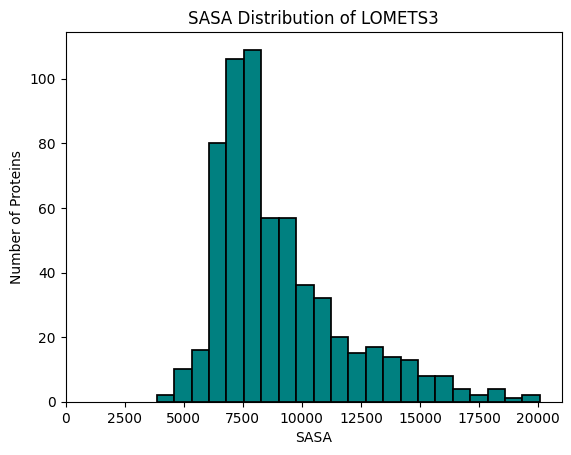

In [8]:
sasa_sort = dataset
sasa_sort = sasa_sort.sort_values(by=["SASA"], ascending = True)
names = sasa_sort["Name"]
names = names.to_numpy()
sasa = sasa_sort["SASA"]
sasa = sasa.to_numpy()

print(f"The lowest SASA protein is {names[0]}")
print(f"An average SASA protein is {names[310]}")
print(f"The highest SASA protein is {names[611]}")

plt.hist(sasa,
         bins = round(1 + 3.322*np.log(len(sasa))),
         color = "teal",
         edgecolor = "k",
         linewidth = 1.25)
plt.title("SASA Distribution of LOMETS3")
plt.xlabel("SASA")
plt.ylabel("Number of Proteins")
plt.xlim(0, 21_000)
plt.savefig("Lomets3_SASAHist.png", dpi = 400)
plt.show()

# SASAH

The lowest SASAH protein is d2mspa_.pdb
An average SASAH protein is d3o6ca_.pdb
The highest SASAH protein is d2pd1c_.pdb


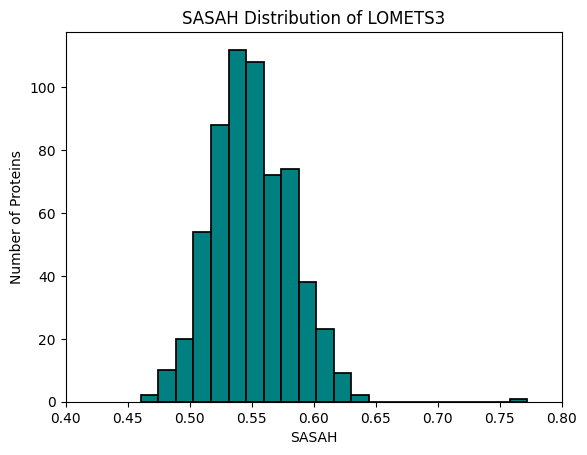

In [4]:
dataset = pd.read_csv("NRSDP_Results.csv")
sasah_sort = dataset
sasah_sort = sasah_sort.sort_values(by=["SASAH"], ascending = True)
names = sasah_sort["Name"]
names = names.to_numpy()
sasah = sasah_sort["SASAH"]
sasah = sasah.to_numpy()

print(f"The lowest SASAH protein is {names[0]}")
print(f"An average SASAH protein is {names[310]}")
print(f"The highest SASAH protein is {names[611]}")

plt.hist(sasah,
         bins = round(1 + 3.322*np.log(len(sasah))),
         color = "teal",
         edgecolor = "k",
         linewidth = 1.25)
plt.title("SASAH Distribution of LOMETS3")
plt.xlabel("SASAH")
plt.ylabel("Number of Proteins")
plt.xlim(0.4, 0.8)
#plt.savefig("Lomets3_SASAHHist.png", dpi = 400)
plt.show()

# Charge

The lowest charge protein is d1exra_.pdb
An average charge protein is d1lxja_.pdb
The highest charge protein is d2j01u1.pdb


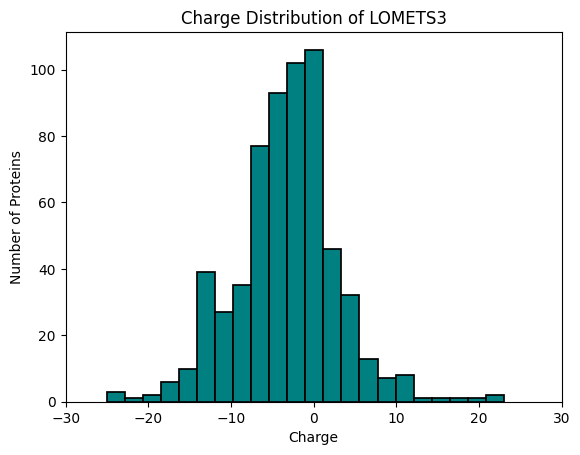

In [3]:
dataset = pd.read_csv("NRSDP_Results.csv")
charge_sort = dataset
charge_sort = charge_sort.sort_values(by=["Charge"], ascending = True)
names = charge_sort["Name"]
names = names.to_numpy()
charge = charge_sort["Charge"]
charge = charge.to_numpy()

print(f"The lowest charge protein is {names[0]}")
print(f"An average charge protein is {names[311]}")
print(f"The highest charge protein is {names[612]}")

plt.hist(charge,
         bins = round(1 + 3.322*np.log(len(charge))),
         color = "teal",
         edgecolor = "k",
         linewidth = 1.25)
plt.title("Charge Distribution of LOMETS3")
plt.xlabel("Charge")
plt.ylabel("Number of Proteins")
plt.xlim(-30, 30)
plt.savefig("Lomets3_chargeHist.png", dpi = 400)
plt.show()